# Hubway Data Overview

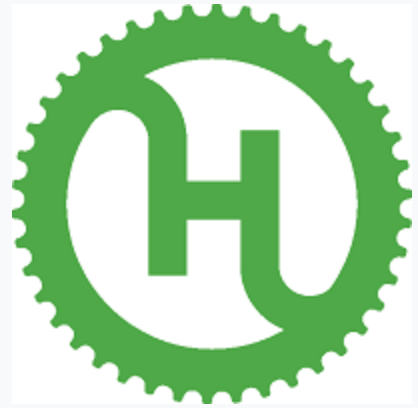

In [76]:
from IPython.display import Image
Image("hubway.png")

In [7]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
import calendar
from datetime import date

#%matplotlib inline  

In [8]:
s1=pd.read_csv('Data/hubway_2011_07_through_2013_11/hubway_trips.csv')

In [9]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579025 entries, 0 to 1579024
Data columns (total 13 columns):
seq_id        1579025 non-null int64
hubway_id     1579025 non-null int64
status        1579025 non-null object
duration      1579025 non-null int64
start_date    1579025 non-null object
strt_statn    1579011 non-null float64
end_date      1579025 non-null object
end_statn     1578980 non-null float64
bike_nr       1578559 non-null object
subsc_type    1579025 non-null object
zip_code      1106259 non-null object
birth_date    350644 non-null float64
gender        1106414 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 156.6+ MB


In [77]:
list(s1)

['seq_id',
 'hubway_id',
 'status',
 'duration',
 'start_date',
 'strt_statn',
 'end_date',
 'end_statn',
 'bike_nr',
 'subsc_type',
 'zip_code',
 'birth_date',
 'gender',
 's_date',
 'SDate',
 'STime']

In [11]:
s1.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


In [12]:
s1.subsc_type.unique()

array(['Registered', 'Casual'], dtype=object)

In [71]:
#s1['strt_statn'].value_counts()

In [14]:
s1['s_date'] = pd.to_datetime(s1['start_date'])

s1['SDate'] = s1['s_date'].dt.date
s1['STime'] = s1['s_date'].dt.time

In [15]:
b=s1.groupby(s1['SDate']).count()

#print(len(b), len(b['SDate'].index))
b.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,s_date,SDate,STime
SDate,,,,,,,,,,,,,,,,
2011-07-28,424,424,424,424,424,424,424,424,424,424,226,226,226,424,424,424
2011-07-29,536,536,536,536,536,536,536,536,531,536,195,195,195,536,536,536
2011-07-30,800,800,800,800,800,800,800,800,798,800,103,103,103,800,800,800
2011-07-31,1007,1007,1007,1007,1007,1007,1007,1006,1001,1007,103,103,103,1007,1007,1007
2011-08-01,788,788,788,788,788,788,788,788,782,788,249,249,249,788,788,788


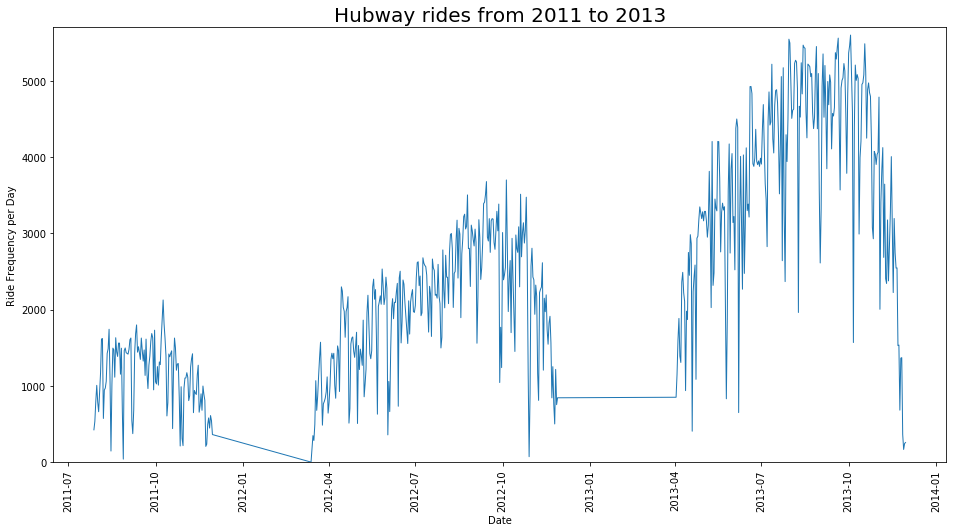

In [19]:
plt.figure(figsize=(16,8))
plt.ylim(0,5700)
plt.xticks(rotation='vertical')
plt.plot(b['SDate'].index,b['SDate'],linewidth=1)
plt.ylabel('Ride Frequency per Day')
plt.xlabel('Date')
plt.title('Hubway rides from 2011 to 2013',fontsize=20)
plt.savefig('ride_frq.pdf', format='pdf')
plt.show()

Now we want to see the share of rides between different genders:

In [20]:
s2=s1.loc[s1['gender'] == 'Male']
s3=s1.loc[s1['gender'] == 'Female']
s4=s1.loc[s1['subsc_type'] == 'Casual']

print('male',len(s2)/len(s1))
print('female',len(s3)/len(s1))
print('casual',len(s4)/len(s1))

b2=s2.groupby(s2['SDate']).count()
b3=s3.groupby(s3['SDate']).count()
b4=s4.groupby(s4['SDate']).count()

male 0.5286262092113805
female 0.17206820664650654
casual 0.299305584142113


And if we want to plot this share:

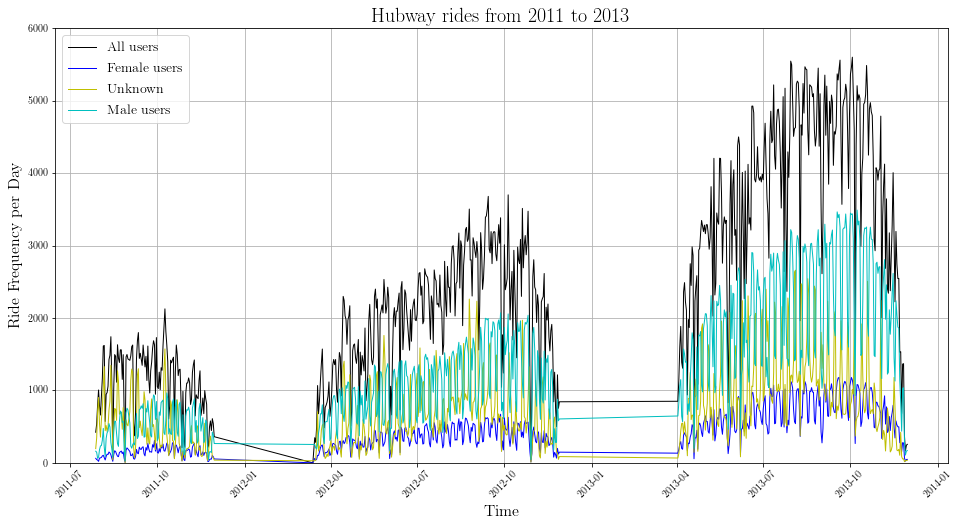

In [21]:
'''mpl.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
mpl.rcParams.update(pgf_with_rc_fonts)
'''

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(16,8))

plt.plot(b.index,b['SDate'],color='k',linewidth=1, label='All users')
plt.plot(b.index,b3['status'], color='b',linewidth=1, label='Female users')

plt.plot(b4.index,b4['status'], color='y',linewidth=1 ,label='Unknown')
plt.plot(b2.index,b2['duration'], color='c',linewidth=1 ,label='Male users')

plt.ylim(0,6000)
plt.grid(True)
plt.ylabel('Ride Frequency per Day',fontsize=16)
plt.xlabel('Time',fontsize=16)
plt.xticks(rotation='45')
plt.title('Hubway rides from 2011 to 2013',fontsize=20)
plt.legend()
plt.grid(which = 'minor')
plt.legend(loc=2, fontsize=14)
plt.savefig('summary.pdf', format='pdf')
plt.show()

# Creating Maps

folium let us to create a map with only one line of code:

In [81]:
import folium 
my_map = folium.Map(location=[48.85,2.3] , zoom_start=11)

my_map

In [82]:
my_map = folium.Map(location=[48.85,2.3] , tiles='Stamen Toner', zoom_start=11)

my_map

You can define lines in the map:

In [83]:
m = folium.Map([48.89, 2.34], zoom_start=13)

#define a line with a set of points:
line=[[48.877, 2.35],[48.876, 2.357],[48.8762027, 2.3579127],[48.8788951, 2.3624612],
      [48.8815852, 2.3659215],[48.8842416, 2.3670741],[48.8884812, 2.3742226]]


folium.PolyLine(locations=line,color= 'blue', weight=4,opacity=0.6).add_to(m)

m

In [84]:
folium.Circle(location=[48.895, 2.3422] , color='red',radius=300).add_to(m)           
folium.Marker(location=[48.8884812, 2.3742226], popup='Marker').add_to(m)

m

# Hubway Visualization

We start with visualizing the stations on the map:

In [22]:
s_data=pd.read_csv('Data/hubway_2011_07_through_2013_11/hubway_stations.csv')

In [23]:
s_data.head()

,id,terminal,station,municipal,lat,lng,status
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing
2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing
3,6,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing
4,7,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing


In [78]:
my_m = folium.Map(location=[42.36,-71.1] , zoom_start=12)

for i in s_data.index:   
    lon=s_data.iloc[i]['lng']
    lat=s_data.iloc[i]['lat']
    folium.Circle(location=[lat,lon] ).add_to(my_m)
        
my_m

In [90]:
s_data.groupby(s_data['municipal']).count()

,id,terminal,station,lat,lng,status
municipal,,,,,,
Boston,97,97,97,97,97,97
Brookline,5,5,5,5,5,5
Cambridge,28,28,28,28,28,28
Somerville,12,12,12,12,12,12


Geopandas 

In [ ]:
#!pip install geopandas

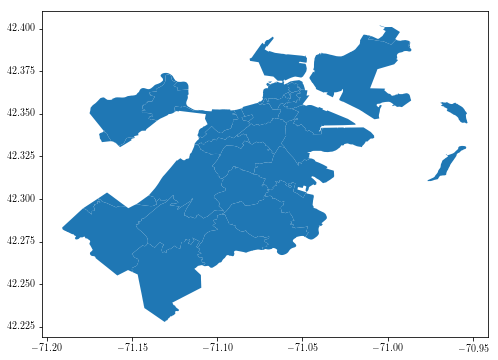

In [102]:
import geopandas

boston = geopandas.read_file('ZIP_codes.geojson')

boston.plot(figsize=(18,6))
plt.show()

Choropleth maps with geopandas:

In [ ]:
import geopandas

cambridge=geopandas.read_file('BOUNDARY_Zipcodes.shp/BOUNDARY_Zipcodes.shp')
sumervil=geopandas.read_file('Wards/Wards.shp')
boston = geopandas.read_file('ZIP_codes.geojson')

In [96]:
boston.head()

,OBJECTID,ZIP5,ShapeSTArea,ShapeSTLength,geometry
0,1,02134,3.721936e+07,40794.182396,POLYGON ((-71.12340461235522 42.36420867214283...
1,2,02125,6.476052e+07,62224.521440,POLYGON ((-71.04541458491363 42.32380666715233...
2,3,02110,6.637284e+06,18358.213496,POLYGON ((-71.05109058896998 42.36418367507441...
3,4,02118,3.116158e+07,32353.407618,POLYGON ((-71.06315159137533 42.34688867055895...
4,5,02126,6.078585e+07,45488.394711,POLYGON ((-71.09669659978795 42.29095065982932...


In [97]:
cambridge.head()

,ZIP_CODE,Shape_area,Shape_len,geometry
0,02140,3.079131e+07,33125.019089,"POLYGON ((748980.0625955313 2969471.499960229,..."
1,02138,8.602992e+07,54385.098588,"POLYGON ((760440.9999407679 2965112.500035748,..."
2,02139,3.953872e+07,28617.425578,"POLYGON ((762789.6250648797 2962415.499965042,..."
3,02141,1.658584e+07,25309.769883,"POLYGON ((765299.3124233633 2960072.499929637,..."
4,02142,1.289288e+07,19785.415051,"POLYGON ((767045.812455073 2959383.250090808, ..."


In [103]:
my_m = folium.Map(location=[42.34,-71.1] , zoom_start=12)

my_m.choropleth(geo_data=boston, line_color='blue',fill_color='blue',fill_opacity=0.2, line_weight=1)  
my_m.choropleth(geo_data=cambridge, line_color='green',fill_color='green',fill_opacity=0.2,line_weight=1)  
my_m.choropleth(geo_data=sumervil, line_color='orange',fill_color='orange',fill_opacity=0.4,line_weight=1)  

my_m

In [104]:
for i in s_data.index:   
    lon=s_data.iloc[i]['lng']
    lat=s_data.iloc[i]['lat']
    if s_data.iloc[i]['municipal']=='Boston' :
        folium.Circle(location=[lat,lon] , color='blue').add_to(my_m)
    elif s_data.iloc[i]['municipal']=='Cambridge':
        folium.Circle(location=[lat,lon] , color='green').add_to(my_m)
    else: 
        folium.Circle(location=[lat,lon] , color='red').add_to(my_m)

my_m

osmnx is a library to open OSM data in networkX

In [99]:
#to install the library:

#!pip install osmnx

In [100]:
import osmnx as ox

Paris = (48.6918383, 2.702996)
street_graph = ox.graph_from_point( Paris, 
        distance=10000, # radius of 1000m 
        distance_type='network', 
        network_type='drive', # could also be 'bicycle', 'walk', etc.  
        simplify=False) # we'll see what this does in a moment

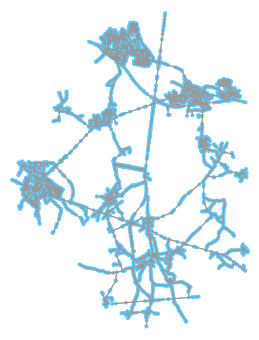

In [101]:
ox.plot_graph(street_graph);